<a href="https://colab.research.google.com/github/114576u/machine-learning/blob/master/validation_and_test_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# This is obtained from 
# https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/validation_and_test_sets.ipynb?utm_source=mlcc&utm_campaign=colab-external&utm_medium=referral&utm_content=validation_tf2-colab&hl=en
# in the context of the machine learning training from
# https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/programming-exercises

# Validation Sets and Test Sets
The previous Colab exercises evaluated the trained model against the training set, which does not provide a strong signal about the quality of your model. In this Colab, you'll experiment with validation sets and test sets.

# Learning objectives
After doing this Colab, you'll know how to do the following:

Split a training set into a smaller training set and a validation set.
Analyze deltas between training set and validation set results.
Test the trained model with a test set to determine whether your trained model is overfitting.
Detect and fix a common training problem.
The dataset
As in the previous exercise, this exercise uses the California Housing dataset to predict the median_house_value at the city block level. Like many "famous" datasets, the California Housing Dataset actually consists of two separate datasets, each living in separate .csv files:

The training set is in california_housing_train.csv.
The test set is in california_housing_test.csv.
You'll create the validation set by dividing the downloaded training set into two parts:

a smaller training set
a validation set

In [19]:

import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [4]:

# we are now loading the datasets to use:
# train_df => contains the training set
# test_df  => contains the test set

train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df  = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [5]:

# we are scaling the value for median_house_value:
scale_factor = 1000.0

# scale the training set's label
train_df["median_house_value"] /= scale_factor

# scale the test set's label
test_df["median_house_value"] /= scale_factor

In [6]:

# creating now the function to build the model (model's topography)
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # most simple tf.keras models are sequential
  model = tf.keras.models.Sequential()

  # add one linear layer to the model to yield a simple linear regression
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # compile the model topography into code that TensorFlow can efficiently execute.
  # Configure training to minimize the model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), 
                loss="mean_squared_error", 
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

print("Defined the build_model function.")

Defined the build_model function.


In [12]:

# define the train model
def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)
  
  # gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # the list of epochs is stored separately from the rest of history
  epochs = history.epoch

  # isolate the root mean squared root for each epoch
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

print("Defined the train_model function.")

Defined the train_model function.


In [13]:

# we define now a plotting function, to show the loss vs epochs for both the training set and the validation set
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  # we are not going to plot the first epoch, since the loss on the first epoch is often substantially greater than the loss for other epochs
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


# Experiment with the validation split
In the following code cell, you'll see a variable named **validation_split**, which we've initialized at 0.2. The validation_split variable specifies the proportion of the original training set that will serve as the validation set. The original training set contains 17,000 examples. Therefore, a validation_split of 0.2 means that:

17,000 * 0.2 ~= 3,400 examples will become the validation set.
17,000 * 0.8 ~= 13,600 examples will become the new training set.

The following code builds a model, trains it on the training set, and evaluates the built model on both:
*   The training set.
*   The validation set.

If the data in the training set is similar to the data in the validation set, then the two loss curves and the final loss values should be almost identical. However, the loss curves and final loss values are not almost identical. Hmm, that's odd.

Experiment with two or three different values of validation_split. Do different values of validation_split fix the problem?

Epoch 1/30
102/102 [==============================] - 1s 4ms/step - loss: 43862.4766 - root_mean_squared_error: 209.4337 - val_loss: 35230.4219 - val_root_mean_squared_error: 187.6977
Epoch 2/30
102/102 [==============================] - 0s 3ms/step - loss: 29632.1797 - root_mean_squared_error: 172.1400 - val_loss: 23041.2754 - val_root_mean_squared_error: 151.7935
Epoch 3/30
102/102 [==============================] - 0s 3ms/step - loss: 18976.0371 - root_mean_squared_error: 137.7535 - val_loss: 14251.5293 - val_root_mean_squared_error: 119.3798
Epoch 4/30
102/102 [==============================] - 0s 3ms/step - loss: 11805.5762 - root_mean_squared_error: 108.6535 - val_loss: 8945.3496 - val_root_mean_squared_error: 94.5799
Epoch 5/30
102/102 [==============================] - 0s 3ms/step - loss: 8082.1064 - root_mean_squared_error: 89.9005 - val_loss: 6907.6890 - val_root_mean_squared_error: 83.1125
Epoch 6/30
102/102 [==============================] - 0s 3ms/step - loss: 7186.6602 - 

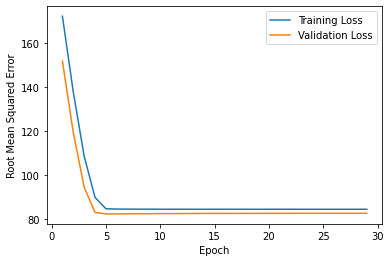

In [16]:

# the following parameters are the hyperparameters
learning_rate = 0.08
epochs = 30
batch_size = 100

# split the original training set into a reduced training set and a validation set
validation_split = 0.4    # jpl::splitting with 0.2 still gives high diffs, but increasing into 0.4, gives very good results

# identify the feature and the label
my_feature = "median_income"    # the median income on a specific city block
my_label   = "median_house_value" # the median house value on a specific city block
# that is, you are going to create a model that predicts house value based solely on the neighborhood's median income

# invoke the function to build and train the model
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, 
                    history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"]
                    )

# Determine why the loss curves differ
No matter how you split the training set and the validation set, the loss curves differ significantly. Evidently, the data in the training set isn't similar enough to the data in the validation set. Counterintuitive? Yes, but this problem is actually pretty common in machine learning.

Your task is to determine why the loss curves aren't highly similar. As with most issues in machine learning, the problem is rooted in the data itself. To solve this mystery of why the training set and validation set aren't almost identical, write a line or two of pandas code in the following code cell. Here are a couple of hints:

The previous code cell split the original training set into:
a reduced training set (the original training set - the validation set)
the validation set
By default, the pandas head method outputs the first 5 rows of the DataFrame. To see more of the training set, specify the n argument to head and assign a large positive integer to n.

In [17]:

# examine examples 0 through 4 and examples 995 through 999 of the training set
train_df.head(1000)

# the original training set is sorted by longitude
# Apparently, longitude influences the relationship of total_rooms to median_house_value

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


In [ ]:

## to fix this problem, we can shuffle the examples in the training set before splitting the examples into a training set and a validation set.
## this can be done following these two steps:
## 1 - shuffle the data in the training set by adding this line anywhere before the call to train_model:
#shuffled_train_df = train_df.reindex(mp.random.permutation(train_df.index))

## 2 - pass shuffled_train_df (instead of train_df) as the second argument to train_model, so it's like
#epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature,
#                                    my_label, epochs, batch_size.
#                                    validation_split)


Epoch 1/70


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 3ms/step - loss: 43559.6758 - root_mean_squared_error: 208.7095 - val_loss: 34185.4414 - val_root_mean_squared_error: 184.8931
Epoch 2/70
136/136 [==============================] - 0s 2ms/step - loss: 25458.9570 - root_mean_squared_error: 159.5586 - val_loss: 19068.9668 - val_root_mean_squared_error: 138.0904
Epoch 3/70
136/136 [==============================] - 0s 2ms/step - loss: 13668.7422 - root_mean_squared_error: 116.9134 - val_loss: 10213.2979 - val_root_mean_squared_error: 101.0609
Epoch 4/70
136/136 [==============================] - 0s 2ms/step - loss: 7983.4541 - root_mean_squared_error: 89.3502 - val_loss: 7270.8623 - val_root_mean_squared_error: 85.2693
Epoch 5/70
136/136 [==============================] - 0s 2ms/step - loss: 6972.2451 - root_mean_squared_error: 83.5000 - val_loss: 7200.1401 - val_root_mean_squared_error: 84.8536
Epoch 6/70
136/136 [==============================] - 0s 2ms/step - loss: 6968.2124 - root_mean_squ

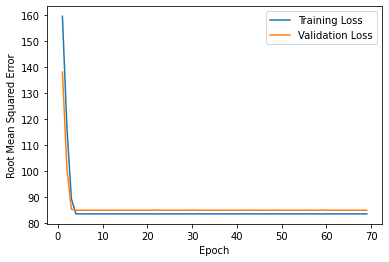

In [20]:

# so, with above changes, what we have now is
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based solely on the neighborhood's median income.  

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [21]:

# now we are going to use the test dataset to evaluate our model's performance:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

print(results)

30/30 [==============================] - 0s 1ms/step - loss: 7012.3813 - root_mean_squared_error: 83.7400
[7012.38134765625, 83.73995971679688]


In [ ]:

# Compare the root mean squared error of the model when evaluated on each of the three datasets:

# training set: look for root_mean_squared_error in the final training epoch.
# validation set: look for val_root_mean_squared_error in the final training epoch.
# test set: run the preceding code cell and examine the root_mean_squared_error.